# Тема проекта ""

**Анализ статистики** популярных YouTube-каналов и их **взаимосвязь** с **социально-экономическими показателями стран**.

# Описание проекта

Данный проект  **Анализ статистики популярных YouTube-каналов и их взаимосвязь с социально-экономическими показателями стран** направлен на анализ данных о самых популярных YouTube-каналах с целью выявления закономерностей и взаимосвязей между количеством подписчиков, просмотрами и социально-экономическими показателями стран, из которых происходят ютуберы. Используя статистику по YouTube, а также данные о высшем образовании, населении, безработице и уровне урбанизации, проект исследует, как эти факторы влияют на успех каналов и их содержимого.

Проект включает в себя сбор и анализ данных, их визуализацию, а также выводы о том, какие категории контента наиболее востребованы и приносят значительный доход. Такой анализ может быть полезен не только самим ютуберам для построения своей стратегии, но и маркетологам, исследующим потребительские предпочтения и тренды в онлайн-контенте.

# Цели и задачи проекта

**Цель проекта**:

Цель проекта — исследовать влияние социально-экономических факторов (таких как уровень образования, население и уровень безработицы) на популярность YouTube-каналов, а также определить, какие категории контента пользуются наибольшей популярностью и приносят высокий доход.

**Задачи проекта:**
1. Проведение анализа данных и выявление основных трендов и закономерностей.
2. Оценка влияния различных факторов на популярность видеоконтента, таких как категория видео, время публикации, длительность видео и т.д.
3. Визуализация результатов анализа с использованием графиков и диаграмм.
4. Формулирование выводов и рекомендаций по оптимизации контента для повышения его популярности на платформе.

# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
#Сброс ограничений на количество выводимых столбцов.
pd.set_option('display.max_columns', None)

In [ ]:
#Установка единообразного отображения вещественных чисел с двумя знаками после запятой.
pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:
#получение датафрейма
df = pd.read_csv('Global YouTube Statistics.csv', encoding = 'latin1')

In [ ]:
#вывод первых строк
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,"228,000,000,000.00",Music,T-Series,20082,India,IN,Music,1.00,1.00,1.00,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00","2,006.00",Mar,13.00,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96
1,2,YouTube Movies,170000000,0.00,Film & Animation,youtubemovies,1,United States,US,Games,"4,055,159.00","7,670.00","7,423.00",12.00,0.00,0.05,0.04,0.58,NaN,"2,006.00",Mar,5.00,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
2,3,MrBeast,166000000,"28,368,841,870.00",Entertainment,MrBeast,741,United States,US,Entertainment,48.00,1.00,1.00,"1,348,000,000.00","337,000.00","5,400,000.00","4,000,000.00","64,700,000.00","8,000,000.00","2,012.00",Feb,20.00,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
3,4,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.00,2.00,1.00,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00","2,006.00",Sep,1.00,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
4,5,SET India,159000000,"148,000,000,000.00",Shows,SET India,116536,India,IN,Entertainment,3.00,2.00,2.00,"1,824,000,000.00","455,900.00","7,300,000.00","5,500,000.00","87,500,000.00","1,000,000.00","2,006.00",Sep,20.00,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96


In [ ]:
#вывод последних строк
df.tail(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
990,991,Natan por Aï¿,12300000,"9,029,609,749.00",Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.00,55.00,172.00,"552,513,000.00","138,100.00","2,200,000.00","1,700,000.00","26,500,000.00","700,000.00","2,017.00",Feb,12.00,51.30,"212,559,417.00",12.08,"183,241,641.00",-14.24,-51.93
991,992,Free Fire India Official,12300000,"1,674,409,945.00",People & Blogs,Free Fire India Official,1500,India,IN,Games,"6,141.00",125.00,69.00,"64,735,000.00","16,200.00","258,900.00","194,200.00","3,100,000.00","300,000.00","2,018.00",Sep,14.00,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96
992,993,Panda,12300000,"2,214,684,303.00",NaN,HybridPanda,2452,United Kingdom,GB,Games,"129,005.00",867.00,"1,202.00","67,035.00",17.00,268.00,201.00,"3,200.00","1,000.00","2,006.00",Sep,11.00,60.00,"66,834,405.00",3.85,"55,908,316.00",55.38,-3.44
993,994,RobTopGames,12300000,"374,123,483.00",Gaming,RobTopGames,39,Sweden,SE,Games,"35,112.00",4.00,69.00,"3,871,000.00",968.00,"15,500.00","11,600.00","185,800.00","100,000.00","2,012.00",May,9.00,67.00,"10,285,453.00",6.48,"9,021,165.00",60.13,18.64
994,995,Make Joke Of,12300000,"2,129,773,714.00",Comedy,Make Joke Of,62,India,IN,Comedy,"4,568.00",125.00,44.00,"24,000,000.00","6,000.00","96,000.00","72,000.00","1,200,000.00","100,000.00","2,017.00",Aug,1.00,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96


In [ ]:
#вывод случайных строк
df.sample(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
535,536,LuisFonsiVEVO,17000000,"14,543,594,822.00",Music,LuisFonsiVEVO,97,United States,US,Music,241.00,133.00,112.00,"49,817,000.00","12,500.00","199,300.00","149,500.00","2,400,000.00",NaN,"2,009.00",May,12.00,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
71,72,Kimberly Loaiza,41300000,"5,603,111,948.00",People & Blogs,Kimberly Loaiza,291,Mexico,MX,People,"1,157.00",2.00,1.00,"136,745,000.00","34,200.00","547,000.00","410,200.00","6,600,000.00","400,000.00","2,016.00",Nov,16.00,40.20,"126,014,024.00",3.42,"102,626,859.00",23.63,-102.55
821,822,O Que Nï¿½ï¿½ï¿½ï¿½ï¿½ï¿,13700000,"1,967,930,734.00",Comedy,O Que Nï¿½ï¿½ï¿½ï¿½ï¿½ï¿,696,Brazil,BR,Entertainment,"5,035.00",47.00,159.00,"87,804,000.00","22,000.00","351,200.00","263,400.00","4,200,000.00","200,000.00","2,015.00",Feb,6.00,51.30,"212,559,417.00",12.08,"183,241,641.00",-14.24,-51.93
52,53,Fernanfloo,46100000,"10,323,391,593.00",Gaming,Fernanfloo,543,El Salvador,SV,Games,419.00,1.00,3.00,"33,842,000.00","8,500.00","135,400.00","101,500.00","1,600,000.00","200,000.00","2,011.00",May,2.00,29.40,"6,453,553.00",4.11,"4,694,702.00",13.79,-88.90
83,84,GR6 EXPLODE,38900000,"25,154,232,306.00",Music,GR6 EXPLODE,3043,Brazil,BR,Music,73.00,6.00,30.00,"1,635,000,000.00","408,700.00","6,500,000.00","4,900,000.00","78,500,000.00","100,000.00","2,014.00",Aug,5.00,51.30,"212,559,417.00",12.08,"183,241,641.00",-14.24,-51.93


In [ ]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of      rank                    Youtuber  subscribers        video views  \
0       1                    T-Series    245000000 228,000,000,000.00   
1       2              YouTube Movies    170000000               0.00   
2       3                     MrBeast    166000000  28,368,841,870.00   
3       4  Cocomelon - Nursery Rhymes    162000000 164,000,000,000.00   
4       5                   SET India    159000000 148,000,000,000.00   
..    ...                         ...          ...                ...   
990   991               Natan por Aï¿     12300000   9,029,609,749.00   
991   992    Free Fire India Official     12300000   1,674,409,945.00   
992   993                       Panda     12300000   2,214,684,303.00   
993   994                 RobTopGames     12300000     374,123,483.00   
994   995                Make Joke Of     12300000   2,129,773,714.00   

             category                       Title  uploads         Country  \
0               Music                    T-Series    20082           India   
1    Film & Animation               youtubemovies        1   United States   
2       Entertainment                     MrBeast      741   United States   
3           Education  Cocomelon - Nursery Rhymes      966   United States   
4               Shows                   SET India   116536           India   
..                ...                         ...      ...             ...   
990            Sports               Natan por Aï¿     1200          Brazil   
991    People & Blogs    Free Fire India Official     1500           India   
992               NaN                 HybridPanda     2452  United Kingdom   
993            Gaming                 RobTopGames       39          Sweden   
994            Comedy                Make Joke Of       62           India   

    Abbreviation   channel_type  video_views_rank  country_rank  \
0             IN          Music              1.00          1.00   
1             US          Games      4,055,159.00      7,670.00   
2             US  Entertainment             48.00          1.00   
3             US      Education              2.00          2.00   
4             IN  Entertainment              3.00          2.00   
..           ...            ...               ...           ...   
990           BR  Entertainment            525.00         55.00   
991           IN          Games          6,141.00        125.00   
992           GB          Games        129,005.00        867.00   
993           SE          Games         35,112.00          4.00   
994           IN         Comedy          4,568.00        125.00   

     channel_type_rank  video_views_for_the_last_30_days  \
0                 1.00                  2,258,000,000.00   
1             7,423.00                             12.00   
2                 1.00                  1,348,000,000.00   
3                 1.00                  1,975,000,000.00   
4                 2.00                  1,824,000,000.00   
..                 ...                               ...   
990             172.00                    552,513,000.00   
991              69.00                     64,735,000.00   
992           1,202.00                         67,035.00   
993              69.00                      3,871,000.00   
994              44.00                     24,000,000.00   

     lowest_monthly_earnings  highest_monthly_earnings  \
0                 564,600.00              9,000,000.00   
1                       0.00                      0.05   
2                 337,000.00              5,400,000.00   
3                 493,800.00              7,900,000.00   
4                 455,900.00              7,300,000.00   
..                       ...                       ...   
990               138,100.00              2,200,000.00   
991                16,200.00                258,900.00   
992                    17.00                    268.00   
993                   968.00                 15,

In [ ]:
df.dtypes

,0
rank,int64
Youtuber,object
subscribers,int64
video views,float64
category,object
Title,object
uploads,int64
Country,object
Abbreviation,object
channel_type,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

**Предварительный вывод по данным**

Таблица **Global YouTube Statistics** содержит информацию о статистики  самых популярных ютуб каналов


* **rank** - *Ранг канала в общем топе*
* **Youtuber** - *Ютубер*
* **subscribers** - *количество подписчиков*
* **video** views - *сумма всех просмотров видео на канале*
* **category** - *категория контента*
* **Title** - *название канала*
* **uploads** - *количество видео, загруженных на канал Ютубера*
* **Country** - *страна, из которой происходит Ютубер*
* **Abbreviation** - *двухбуквенная аббревиатура страны Ютубера*
* **channel_type** - *тип контента на канале Ютубера*
* **video_views_rank** - *ранг Ютубера по количеству просмотров*
* **country_rank** - *ранг Ютубера в своей стране*
* **channel_type_rank** - *ранг Ютубера по типу канала*
* **video_views_for_the_last_30_days** - *количество просмотров видео за последние 30 дней*
* **lowest_monthly_earnings** - *самые низкие ежемесячные доходы*
* **highest_monthly_earnings** - *самые высокие ежемесячные доходы*
* **lowest_yearly_earnings** - *самые низкие годовые доходы*
* **highest_yearly_earnings** - *самые высокие годовые доходы*
* **subscribers_for_last_30_days** - *количество подписчиков за последние 30 дней*
* **created_year** - *год создания*
* **created_month** - *месяц создания*
* **created_date** - *дата создания*
* **Gross tertiary education enrollment (%)** - *Общее количество зачислений в высшие учебные заведения (%)*
* **Population** - *Население*
* **Unemployment** rate - *Уровень безработицы*
* **Urban_population** - *Урбанизация населения*
* **Latitude** - *Широта*
* **Longitude** - *Долгота*








1.   В датафрейме **995 записей, 28 столбцов.**
2.   в 18 столбцах имеються пропущенные значения.
3.   Нарушения стлия в заголовке столбца **Youtuber, Title, Country, Abbreviation, Gross tertiary education enrollment, Population, Unemployment rate,  Urban_population, Latitude, Longitude**,следует изминить регистр.
4.   Ошибок в типах данных столбцов не выявлено
5.   Более детально необходимо посмотреть на строковые значения в столбцах title (в некоторых наименованиях неверно отображаються названия на других языках)



In [ ]:
#удоление столбцов которые не будт учавствовать при анализе по моей теме
df.drop(columns=['Latitude','Longitude','created_year', 'created_month', 'created_date', 'video_views_rank', 'country_rank', 'channel_type_rank', 'uploads'],  inplace = True)

In [ ]:
df.head()


,rank,Youtuber,subscribers,video views,category,Title,Country,Abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
0,1,T-Series,245000000,"228,000,000,000.00",Music,T-Series,India,IN,Music,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
1,2,YouTube Movies,170000000,0.00,Film & Animation,youtubemovies,United States,US,Games,12.00,0.00,0.05,0.04,0.58,NaN,88.20,"328,239,523.00",14.70,"270,663,028.00"
2,3,MrBeast,166000000,"28,368,841,870.00",Entertainment,MrBeast,United States,US,Entertainment,"1,348,000,000.00","337,000.00","5,400,000.00","4,000,000.00","64,700,000.00","8,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
3,4,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,United States,US,Education,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
4,5,SET India,159000000,"148,000,000,000.00",Shows,SET India,India,IN,Entertainment,"1,824,000,000.00","455,900.00","7,300,000.00","5,500,000.00","87,500,000.00","1,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"


In [ ]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'Country', 'Abbreviation', 'channel_type',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population'],
      dtype='object')

In [ ]:
df.rename(columns = {'Youtuber' : 'youtuber'} , inplace = True)
df.rename(columns = {'video views' : 'video_views'} , inplace = True)
df.rename(columns = {'Title' : 'title'} , inplace = True)
df.rename(columns = {'Country' : 'country'} , inplace = True)
df.rename(columns = {'Abbreviation' : 'abbreviation'} , inplace = True)
df.rename(columns = {'Gross tertiary education enrollment (%)' : 'gross_tertiary_education_enrollment'} , inplace = True)
df.rename(columns = {'Population' : 'population'} , inplace = True)
df.rename(columns = {'Unemployment rate' : 'unemployment_rate'} , inplace = True)
df.rename(columns = {'Urban_population' : 'urban_population'} , inplace = True)
df.columns


Index(['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title',
       'country', 'abbreviation', 'channel_type',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'gross_tertiary_education_enrollment', 'population',
       'unemployment_rate', 'urban_population'],
      dtype='object')

## 2. Изучение пропущенных значений

In [ ]:
df.isna().sum()

,0
rank,0
youtuber,0
subscribers,0
video_views,0
category,46
title,0
country,122
abbreviation,122
channel_type,30
video_views_for_the_last_30_days,56


В датафрейми выявлены пропуски и все пропуски  я удолю , так как не знаю страны "country" не возможно выявитьвсе оставшиеся значения, а столбец "subscribers_for_last_30_days" невозможно легко подсчитать и внести более 300 значений , что будет не своеобразной тратой времяни

In [ ]:
missing_ratings = df[(df['country'].isna()) |  (df['category'].isna()) |  (df['channel_type'].isna()) |  (df['gross_tertiary_education_enrollment'].isna()) |  (df['population'].isna())
|  (df['unemployment_rate'].isna()) |  (df['unemployment_rate'].isna()) |  (df['subscribers_for_last_30_days'].isna()) |  (df['video_views_for_the_last_30_days'].isna())]
missing_ratings


,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
1,2,YouTube Movies,170000000,0.00,Film & Animation,youtubemovies,United States,US,Games,12.00,0.00,0.05,0.04,0.58,NaN,88.20,"328,239,523.00",14.70,"270,663,028.00"
5,6,Music,119000000,0.00,NaN,Music,NaN,NaN,Music,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,"93,247,040,539.00",People & Blogs,ýýý Kids Diana Show,United States,US,Entertainment,"731,674,000.00","182,900.00","2,900,000.00","2,200,000.00","35,100,000.00",NaN,88.20,"328,239,523.00",14.70,"270,663,028.00"
7,8,PewDiePie,111000000,"29,058,044,447.00",Gaming,PewDiePie,Japan,JP,Entertainment,"39,184,000.00","9,800.00","156,700.00","117,600.00","1,900,000.00",NaN,63.20,"126,226,568.00",2.29,"115,782,416.00"
12,13,Gaming,93600000,0.00,NaN,Gaming,NaN,NaN,Games,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,MoniLina,12400000,"16,086,808,918.00",Comedy,MoniLinaFamily,United States,US,People,NaN,0.00,0.00,0.00,0.00,100.00,88.20,"328,239,523.00",14.70,"270,663,028.00"
985,986,TKOR,12400000,"3,392,022,527.00",Education,TKoR,NaN,NaN,People,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
986,987,ANNA KOVA,12400000,"13,959,586,308.00",People & Blogs,annakova,NaN,NaN,Film,2.00,0.00,0.01,0.01,0.10,NaN,NaN,NaN,NaN,NaN
987,988,Avril Lavigne,12400000,"6,202,090,191.00",Music,Avril Lavigne,United States,US,Music,"50,188,000.00","12,500.00","200,800.00","150,600.00","2,400,000.00",NaN,88.20,"328,239,523.00",14.70,"270,663,028.00"


In [ ]:
df = df[~df['rank'].isin(missing_ratings['rank'])]
df.sample(7)


,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
759,760,Coke Studio,14400000,"4,035,738,731.00",Music,Rohail Hyatt,United States,US,Music,"3,557,000.00",889.00,"14,200.00","10,700.00","170,700.00","10,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
984,985,bharatzkitchen HINDI,12400000,"2,315,226,648.00",Howto & Style,bharatzkitchen HINDI,India,IN,Howto,"30,968,000.00","7,700.00","123,900.00","92,900.00","1,500,000.00","100,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
39,40,Ed Sheeran,53500000,"30,367,676,736.00",Music,Ed Sheeran,United Kingdom,GB,Music,"202,720,000.00","50,700.00","810,900.00","608,200.00","9,700,000.00","100,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
630,631,Katakit Baby TV,15500000,"6,386,271,870.00",Music,Katakit Baby TV,Saudi Arabia,SA,Music,"90,914,000.00","22,700.00","363,700.00","272,700.00","4,400,000.00","200,000.00",68.00,"34,268,528.00",5.93,"28,807,838.00"
899,900,DJ Khaled,13100000,"6,637,820,731.00",Music,DjKhaled,Samoa,WS,Music,379.00,0.09,2.00,1.00,18.00,3.00,7.60,"202,506.00",8.36,"35,588.00"
938,939,Blossom,12700000,"4,733,873,025.00",Howto & Style,Blossom,United States,US,Howto,"43,868,000.00","11,000.00","175,500.00","131,600.00","2,100,000.00","100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
772,773,SIS vs BRO,14200000,"6,973,932,553.00",Entertainment,SiS,Ukraine,UA,Entertainment,105.00,0.03,0.42,0.32,5.00,10.00,82.70,"44,385,155.00",8.88,"30,835,699.00"


### **Выводы**

В датафрейме имеються как и числовые  данный так и строковые данные, после проверки и отчисттки датафрейма в нем больше  нет проспусков в строках, все проблемы устранены

## 3. Изменение типов данных

Изменения типов данных не потребовалось

## 4. Поиск дубликатов

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [rank, youtuber, subscribers, video_views, category, title, country, abbreviation, channel_type, video_views_for_the_last_30_days, lowest_monthly_earnings, highest_monthly_earnings, lowest_yearly_earnings, highest_yearly_earnings, subscribers_for_last_30_days, gross_tertiary_education_enrollment, population, unemployment_rate, urban_population]
Index: []



В результате поиска дубликатов с помощью метода duplicated() показал, что в данном датафрейме нет дубликатов.

## 5. Выводы к разделу 1

Данный даатфрейм на данный момент содержит 554 строчек и 19 столбцов были приведены к нижнему регистру названия столбцов, для более правильной работы с данными, так же были удалены строчки и спропущенными значениями которые невозможно заполнить.
Результаты анализа привели к тому , что в этом датафрейме отсутствуют дубликаты, и все данные являются уникальными без повторяющихся элементов. Таким образом, выполненная обработка обеспечила получение чистого и структурированного датафрейма, который готов к дальнейшему анализу и исследованию.

# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

In [ ]:
df.loc[387] #содержимое определенной строки

,387
rank,388
youtuber,Kiddiestv Hindi - Nursery Rhymes & Kids Songs
subscribers,20200000
video_views,"7,274,150,246.00"
category,Education
title,Kiddiestv Hindi - Nursery Rhymes & Kids Songs
country,India
abbreviation,IN
channel_type,Education
video_views_for_the_last_30_days,"113,420,000.00"


In [ ]:
df[289:299] #получене определенных строк

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
471,472,Jake Fellman,18100000,"13,378,360,425.00",Entertainment,Jake Fellman,United States,US,Entertainment,"497,044,000.00","124,300.00","2,000,000.00","1,500,000.00","23,900,000.00","700,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
473,474,SQUEEZIE,18100000,"9,983,065,083.00",Gaming,SQUEEZIE,France,FR,Entertainment,"48,099,000.00","12,000.00","192,400.00","144,300.00","2,300,000.00","100,000.00",65.60,"67,059,887.00",8.43,"54,123,364.00"
474,475,Blippi - Educational Videos for Kids,18100000,"14,857,290,259.00",Education,Blippi - Educational Videos for Kids,United States,US,Education,"180,412,000.00","45,100.00","721,600.00","541,200.00","8,700,000.00","300,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
477,478,Manual do Mundo,18000000,"3,980,991,248.00",Howto & Style,Manual do Mundo,Brazil,BR,Tech,"54,766,000.00","13,700.00","219,100.00","164,300.00","2,600,000.00","100,000.00",51.30,"212,559,417.00",12.08,"183,241,641.00"
478,479,How Ridiculous,18000000,"9,601,137,077.00",Sports,How Ridiculous,Australia,AU,Sports,"391,298,000.00","97,800.00","1,600,000.00","1,200,000.00","18,800,000.00","600,000.00",113.10,"25,766,605.00",5.27,"21,844,756.00"
481,482,SonyMusicSouthVEVO,18000000,"17,921,124,985.00",Music,SonyMusicSouthVEVO,United States,US,Music,"257,597,000.00","64,400.00","1,000,000.00","772,800.00","12,400,000.00","100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
484,485,David Dobrik,17900000,"7,176,572,299.00",People & Blogs,David Dobrik,United States,US,People,"8,650,000.00","2,200.00","34,600.00","26,000.00","415,200.00","100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
485,486,KatieAngel,17900000,"3,841,205,465.00",People & Blogs,KatieAngel,United States,US,Music,"51,687,000.00","12,900.00","206,700.00","155,100.00","2,500,000.00","100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
486,487,RobleisIUTU,17900000,"5,168,721,499.00",Entertainment,RobleisIUTU,Argentina,AR,Games,"27,545,000.00","6,900.00","110,200.00","82,600.00","1,300,000.00","100,000.00",90.00,"44,938,712.00",9.79,"41,339,571.00"
489,490,Like Nastya VNM,17900000,"9,867,515,979.00",Entertainment,Like Nastya VNM,Vietnam,VN,Entertainment,"84,467,000.00","21,100.00","337,900.00","253,400.00","4,100,000.00","100,000.00",28.50,"96,462,106.00",2.01,"35,332,140.00"


In [ ]:
df.loc[220:235, 'youtuber']

,youtuber
221,Indosiar
223,David Guetta
225,Nicki Minaj
227,TaylorSwiftVEVO
229,Post Malone
230,Rans Entertainment
231,LankyBox
232,Coldplay
234,WB Kids


In [ ]:
df.loc[:15, 'country']

,country
0,India
2,United States
3,United States
4,India
8,Russia
9,United States
10,India
11,United States
13,South Korea
15,India


In [ ]:
df.loc[400:420, 'subscribers':'title']

,subscribers,video_views,category,title
402,20000000,"3,875,172,235.00",Entertainment,Gordon Ramsay
404,20000000,"9,715,291,883.00",Film & Animation,Green Gold TV - Official Channel
405,19900000,"13,917,423,958.00",Music,Gusttavo Lima Oficial
407,19800000,"5,759,442,450.00",People & Blogs,Crafty Panda
412,19700000,"11,323,617,496.00",Entertainment,Britain's Got Talent
415,19600000,"13,930,021,471.00",Shows,Sony AATH
416,19600000,"8,779,729,549.00",Entertainment,tabii Urdu
417,19600000,"7,906,181,776.00",Film & Animation,DaFuq!?Boom!
419,19500000,"5,234,251,168.00",Entertainment,RKD Studios
420,19400000,"2,255,542,592.00",News & Politics,DLS News


### Логическая

In [ ]:
df['country'].value_counts()

,count
country,
United States,179
India,139
Brazil,33
United Kingdom,26
Indonesia,19
Mexico,17
Russia,13
Thailand,13
Spain,11


In [ ]:
df.loc[df.loc[:, 'country'] == 'Russia'][['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title']]

,rank,youtuber,subscribers,video_views,category,title
8,9,Like Nastya,106000000,"90,479,060,027.00",People & Blogs,Like Nastya Vlog
46,47,Get Movies,47500000,"30,788,679,536.00",Entertainment,Get Movies
64,65,ýýýýýýýý ýý ýýýýýýýýýýýýýý,43200000,"36,458,726,976.00",Film & Animation,ýýýýýýýý ýý ýýýýýýýýýýýýýý
367,368,tuzelity SHUFFLE,20700000,"8,658,941,531.00",People & Blogs,tuzelity SHUFFLE
456,457,Marmok,18500000,"3,457,618,361.00",Gaming,Marmok
458,459,Like Nastya Vlog,18500000,"8,147,575,884.00",People & Blogs,Like Nastya Vlog
529,530,TheBrianMaps,17100000,"4,448,334,716.00",Comedy,TheBrianMaps
649,650,ILYA BORZOV,15300000,"9,938,811,455.00",People & Blogs,ILYA BORZOV
670,671,EdisonPts,15100000,"6,668,507,856.00",Gaming,EdisonPts
674,675,Chapitosiki,15100000,"13,897,932,103.00",Entertainment,Chapitosiki


In [ ]:
df.loc[df.loc[:, 'subscribers'] == df.subscribers.min()][['youtuber', 'category']]

,youtuber,category
990,Natan por Aï¿,Sports
991,Free Fire India Official,People & Blogs
993,RobTopGames,Gaming
994,Make Joke Of,Comedy


In [ ]:
df.loc[df.loc[:, 'video_views'] >= 70000000000.00]

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
0,1,T-Series,245000000,"228,000,000,000.00",Music,T-Series,India,IN,Music,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
3,4,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,United States,US,Education,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
4,5,SET India,159000000,"148,000,000,000.00",Shows,SET India,India,IN,Entertainment,"1,824,000,000.00","455,900.00","7,300,000.00","5,500,000.00","87,500,000.00","1,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
8,9,Like Nastya,106000000,"90,479,060,027.00",People & Blogs,Like Nastya Vlog,Russia,RU,People,"48,947,000.00","12,200.00","195,800.00","146,800.00","2,300,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
9,10,Vlad and Niki,98900000,"77,180,169,894.00",Entertainment,Vlad and Niki,United States,US,Entertainment,"580,574,000.00","145,100.00","2,300,000.00","1,700,000.00","27,900,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
11,12,WWE,96000000,"77,428,473,662.00",Sports,WWE,United States,US,Sports,"714,614,000.00","178,700.00","2,900,000.00","2,100,000.00","34,300,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
15,16,Sony SAB,83000000,"101,000,000,000.00",Shows,Sony SAB,India,IN,Entertainment,"1,657,000,000.00","414,300.00","6,600,000.00","5,000,000.00","79,600,000.00","1,100,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
21,22,Zee TV,70500000,"73,139,054,467.00",Entertainment,Zee TV,India,IN,Entertainment,"1,707,000,000.00","426,800.00","6,800,000.00","5,100,000.00","81,900,000.00","900,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"


In [ ]:
res = df[(df['subscribers'] > 65500000) & (df['subscribers'] < 96000000)]
res

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
13,14,BLACKPINK,89800000,"32,144,597,566.00",People & Blogs,BLACKPINK,South Korea,KR,Music,"498,930,000.00","124,700.00","2,000,000.00","1,500,000.00","23,900,000.00","700,000.00",94.30,"51,709,098.00",4.15,"42,106,719.00"
15,16,Sony SAB,83000000,"101,000,000,000.00",Shows,Sony SAB,India,IN,Entertainment,"1,657,000,000.00","414,300.00","6,600,000.00","5,000,000.00","79,600,000.00","1,100,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
17,18,BANGTANTV,75600000,"20,826,993,957.00",Music,BANGTANTV,South Korea,KR,Music,"168,290,000.00","42,100.00","673,200.00","504,900.00","8,100,000.00","400,000.00",94.30,"51,709,098.00",4.15,"42,106,719.00"
19,20,Justin Bieber,71600000,"30,608,119,724.00",Music,Justin Bieber,Canada,CA,Music,"176,326,000.00","44,100.00","705,300.00","529,000.00","8,500,000.00","100,000.00",68.90,"36,991,981.00",5.56,"30,628,482.00"
20,21,HYBE LABELS,71300000,"28,634,566,938.00",Music,HYBE LABELS,South Korea,KR,Music,"598,173,000.00","149,500.00","2,400,000.00","1,800,000.00","28,700,000.00","900,000.00",94.30,"51,709,098.00",4.15,"42,106,719.00"
21,22,Zee TV,70500000,"73,139,054,467.00",Entertainment,Zee TV,India,IN,Entertainment,"1,707,000,000.00","426,800.00","6,800,000.00","5,100,000.00","81,900,000.00","900,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
22,23,Pinkfong Baby Shark - Kids' Songs & Stories,68200000,"38,843,229,963.00",Education,Pinkfong Baby Shark - Kids' Songs & Stories,United States,US,Education,"473,387,000.00","118,300.00","1,900,000.00","1,400,000.00","22,700,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
24,25,ChuChu TV Nursery Rhymes & Kids Songs,65900000,"45,757,850,229.00",Education,ChuChu TV Nursery Rhymes & Kids Songs,India,IN,Education,"420,292,000.00","105,100.00","1,700,000.00","1,300,000.00","20,200,000.00","500,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
25,26,Shemaroo Filmi Gaane,65600000,"28,648,024,439.00",Music,Shemaroo Filmi Gaane,India,IN,Music,"254,961,000.00","63,700.00","1,000,000.00","764,900.00","12,200,000.00","400,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"


In [ ]:
df.loc[df.loc[:, 'category'] == 'Music'][['rank', 'subscribers', 'video_views']]

,rank,subscribers,video_views
0,1,245000000,"228,000,000,000.00"
10,11,96700000,"57,856,289,381.00"
17,18,75600000,"20,826,993,957.00"
19,20,71600000,"30,608,119,724.00"
20,21,71300000,"28,634,566,938.00"
...,...,...,...
924,925,12800000,"6,662,288,136.00"
936,937,12700000,"9,927,699,419.00"
961,962,12500000,"7,489,455,451.00"
965,966,12500000,"16,690,788,752.00"


## 2. Сортировка данных

In [ ]:
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title',
       'country', 'abbreviation', 'channel_type',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'gross_tertiary_education_enrollment', 'population',
       'unemployment_rate', 'urban_population'],
      dtype='object')

In [ ]:
sorted_by_subscribers = df.sort_values(by='subscribers', ascending=False)
sorted_by_subscribers

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
0,1,T-Series,245000000,"228,000,000,000.00",Music,T-Series,India,IN,Music,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
2,3,MrBeast,166000000,"28,368,841,870.00",Entertainment,MrBeast,United States,US,Entertainment,"1,348,000,000.00","337,000.00","5,400,000.00","4,000,000.00","64,700,000.00","8,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
3,4,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,United States,US,Education,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
4,5,SET India,159000000,"148,000,000,000.00",Shows,SET India,India,IN,Entertainment,"1,824,000,000.00","455,900.00","7,300,000.00","5,500,000.00","87,500,000.00","1,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
8,9,Like Nastya,106000000,"90,479,060,027.00",People & Blogs,Like Nastya Vlog,Russia,RU,People,"48,947,000.00","12,200.00","195,800.00","146,800.00","2,300,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,"6,993,406,259.00",Music,Migos ATL,United States,US,Entertainment,"49,412,000.00","12,400.00","197,600.00","148,200.00","2,400,000.00","100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
990,991,Natan por Aï¿,12300000,"9,029,609,749.00",Sports,Natan por Aï¿,Brazil,BR,Entertainment,"552,513,000.00","138,100.00","2,200,000.00","1,700,000.00","26,500,000.00","700,000.00",51.30,"212,559,417.00",12.08,"183,241,641.00"
991,992,Free Fire India Official,12300000,"1,674,409,945.00",People & Blogs,Free Fire India Official,India,IN,Games,"64,735,000.00","16,200.00","258,900.00","194,200.00","3,100,000.00","300,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
993,994,RobTopGames,12300000,"374,123,483.00",Gaming,RobTopGames,Sweden,SE,Games,"3,871,000.00",968.00,"15,500.00","11,600.00","185,800.00","100,000.00",67.00,"10,285,453.00",6.48,"9,021,165.00"


In [ ]:
sorted_by_video_views = df.sort_values(by='video_views', ascending=False)
sorted_by_video_views

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
0,1,T-Series,245000000,"228,000,000,000.00",Music,T-Series,India,IN,Music,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
3,4,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,United States,US,Education,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
4,5,SET India,159000000,"148,000,000,000.00",Shows,SET India,India,IN,Entertainment,"1,824,000,000.00","455,900.00","7,300,000.00","5,500,000.00","87,500,000.00","1,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
15,16,Sony SAB,83000000,"101,000,000,000.00",Shows,Sony SAB,India,IN,Entertainment,"1,657,000,000.00","414,300.00","6,600,000.00","5,000,000.00","79,600,000.00","1,100,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
8,9,Like Nastya,106000000,"90,479,060,027.00",People & Blogs,Like Nastya Vlog,Russia,RU,People,"48,947,000.00","12,200.00","195,800.00","146,800.00","2,300,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,753,ýýýýýýýýýýýýýýýýýýýýý,14400000,"600,154,268.00",Entertainment,ýýýýýýýýýýýýýýýýýýýýý,South Korea,KR,Entertainment,"1,370,000.00",342.00,"5,500.00","4,100.00","65,700.00","300,000.00",94.30,"51,709,098.00",4.15,"42,106,719.00"
993,994,RobTopGames,12300000,"374,123,483.00",Gaming,RobTopGames,Sweden,SE,Games,"3,871,000.00",968.00,"15,500.00","11,600.00","185,800.00","100,000.00",67.00,"10,285,453.00",6.48,"9,021,165.00"
711,712,Beast Philanthropy,14800000,"272,678,287.00",People & Blogs,Beast Philanthropy,Germany,DE,Games,"37,883.00",9.00,152.00,114.00,"1,800.00","3,580.00",70.20,"83,132,799.00",3.04,"64,324,835.00"
902,903,Calon Sarjana,13000000,"10,664,585.00",Entertainment,Calon Sarjana,Indonesia,ID,Entertainment,"2,292,000,000.00",0.00,0.00,0.00,0.00,"300,000.00",36.30,"270,203,917.00",4.69,"151,509,724.00"


In [ ]:
sorted_by_category_and_subscribers = df.sort_values(by=['category', 'subscribers'], ascending=[True, False])
sorted_by_category_and_subscribers

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
333,334,DUDU e CAROL,21600000,"9,597,894,786.00",Autos & Vehicles,DUDU e CAROL,Brazil,BR,Entertainment,"193,174,000.00","48,300.00","772,700.00","579,500.00","9,300,000.00","300,000.00",51.30,"212,559,417.00",12.08,"183,241,641.00"
786,787,Supercar Blondie,14100000,"5,405,563,355.00",Autos & Vehicles,Supercar Blondie,United Arab Emirates,AE,Autos,"353,259,000.00","88,300.00","1,400,000.00","1,100,000.00","17,000,000.00","500,000.00",36.80,"9,770,529.00",2.35,"8,479,744.00"
78,79,CarryMinati,39200000,"3,294,013,141.00",Comedy,CarryMinati,India,IN,Comedy,"78,688,000.00","19,700.00","314,800.00","236,100.00","3,800,000.00","700,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
94,95,Jkk Entertainment,37200000,"16,402,066,717.00",Comedy,Jkk Entertainment,India,IN,Comedy,"49,861,000.00","12,500.00","199,400.00","149,600.00","2,400,000.00","100,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
126,127,KHANDESHI MOVIES,33500000,"11,405,809,704.00",Comedy,KHANDESHI MOVIES,India,IN,Comedy,"24,736,000.00","6,200.00","98,900.00","74,200.00","1,200,000.00","100,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,834,DALLMYD,13600000,"1,948,925,559.00",Sports,DALLMYD,United States,US,Sports,"30,677,000.00","7,700.00","122,700.00","92,000.00","1,500,000.00","100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
913,914,gymvirtual,12900000,"2,509,752,944.00",Sports,gymvirtual,Spain,ES,Sports,"11,993,000.00","3,000.00","48,000.00","36,000.00","575,700.00","100,000.00",88.90,"47,076,781.00",13.96,"37,927,409.00"
990,991,Natan por Aï¿,12300000,"9,029,609,749.00",Sports,Natan por Aï¿,Brazil,BR,Entertainment,"552,513,000.00","138,100.00","2,200,000.00","1,700,000.00","26,500,000.00","700,000.00",51.30,"212,559,417.00",12.08,"183,241,641.00"
70,71,Ishtar Music,41400000,"17,608,931,161.00",Trailers,Ishtar Music,India,IN,Music,"180,942,000.00","45,200.00","723,800.00","542,800.00","8,700,000.00","400,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"


In [ ]:
sorted_by_country_and_video_views_last_30_days = df.sort_values(by=['country', 'video_views_for_the_last_30_days'], ascending=[True, False])
sorted_by_country_and_video_views_last_30_days

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
504,505,El Payaso Plim Plim,17700000,"17,247,584,185.00",Film & Animation,El Payaso Plim Plim,Argentina,AR,Music,"640,030,000.00","160,000.00","2,600,000.00","1,900,000.00","30,700,000.00","600,000.00",90.00,"44,938,712.00",9.79,"41,339,571.00"
31,32,El Reino Infantil,58400000,"57,271,630,846.00",Music,El Reino Infantil,Argentina,AR,Music,"611,828,000.00","153,000.00","2,400,000.00","1,800,000.00","29,400,000.00","600,000.00",90.00,"44,938,712.00",9.79,"41,339,571.00"
672,673,Rubï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,15100000,"9,477,021,288.00",Comedy,Rubï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,Argentina,AR,Comedy,"512,343,000.00","128,100.00","2,000,000.00","1,500,000.00","24,600,000.00","700,000.00",90.00,"44,938,712.00",9.79,"41,339,571.00"
257,258,Alejo Igoa,24100000,"10,999,000,479.00",Comedy,Alejo Igoa,Argentina,AR,Entertainment,"401,512,000.00","100,400.00","1,600,000.00","1,200,000.00","19,300,000.00","600,000.00",90.00,"44,938,712.00",9.79,"41,339,571.00"
105,106,La Granja de Zenï¿½,35700000,"27,118,354,077.00",Music,La Granja de Zenï¿½,Argentina,AR,Music,"302,071,000.00","75,500.00","1,200,000.00","906,200.00","14,500,000.00","400,000.00",90.00,"44,938,712.00",9.79,"41,339,571.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,399,Marvel Entertainment,20100000,"5,634,695,322.00",Entertainment,MarvelEntertainment,United States,US,Film,63.00,0.02,0.25,0.19,3.00,30.00,88.20,"328,239,523.00",14.70,"270,663,028.00"
859,860,The Q,13400000,"4,306,212,515.00",People & Blogs,Tom Duggan,United States,US,Sports,3.00,0.00,0.01,0.01,0.14,1.00,88.20,"328,239,523.00",14.70,"270,663,028.00"
151,152,YOLO AVENTURAS,31200000,"9,673,649,438.00",People & Blogs,YOLO AVENTURAS,Venezuela,VE,Comedy,"3,589.00",0.90,14.00,11.00,172.00,100.00,79.30,"28,515,829.00",8.80,"25,162,368.00"
585,586,POPS Kids,16200000,"9,763,592,867.00",Music,POPS Kids,Vietnam,VN,Film,"256,733,000.00","64,200.00","1,000,000.00","770,200.00","12,300,000.00","200,000.00",28.50,"96,462,106.00",2.01,"35,332,140.00"


##Вывод

1. Сортировка по количеству подписчиков: результаты отсортированы по убыванию количества подписчиков.
2. Сортировка по количеству просмотров видео: результаты отсортированы по убыванию числа просмотров видео.Показывает что количество просмотров не зависит от количества подпищиков и что в 5 лучших входит 3 канала из Индии
3. Сортировка по категории и количеству подписчиков: результаты сначала сортируются по категории (по возрастанию), а затем по количеству подписчиков (по убыванию).
4. Сортировка по странам и просмотрам видео за последние 30 дней: результаты отсортированы по странам (по возрастанию) и, в пределах каждой страны, по количеству просмотров за последние 30 дней (по убыванию).

## 3. Фильтрация данных

## Метод query()

In [ ]:
#фильтрация по котегории спорт
filtered_df = df.query('category == "Sports"')
filtered_df

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
11,12,WWE,96000000,"77,428,473,662.00",Sports,WWE,United States,US,Sports,"714,614,000.00","178,700.00","2,900,000.00","2,100,000.00","34,300,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
28,29,Dude Perfect,59500000,"16,241,549,158.00",Sports,Dude Perfect,United States,US,Sports,"141,200,000.00","35,300.00","564,800.00","423,600.00","6,800,000.00","100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
423,424,FIFA,19400000,"5,529,131,886.00",Sports,FIFA,Switzerland,CH,Sports,"58,863,000.00","14,700.00","235,500.00","176,600.00","2,800,000.00","100,000.00",59.60,"8,574,832.00",4.58,"6,332,428.00"
478,479,How Ridiculous,18000000,"9,601,137,077.00",Sports,How Ridiculous,Australia,AU,Sports,"391,298,000.00","97,800.00","1,600,000.00","1,200,000.00","18,800,000.00","600,000.00",113.10,"25,766,605.00",5.27,"21,844,756.00"
567,568,UFC - Ultimate Fighting Championship,16400000,"7,135,820,721.00",Sports,UFC - Ultimate Fighting Championship,United States,US,Sports,"133,208,000.00","33,300.00","532,800.00","399,600.00","6,400,000.00","100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
646,647,FC Barcelona,15300000,"2,656,528,205.00",Sports,FC Barcelona,Spain,ES,Sports,"84,867,000.00","21,200.00","339,500.00","254,600.00","4,100,000.00","200,000.00",88.90,"47,076,781.00",13.96,"37,927,409.00"
833,834,DALLMYD,13600000,"1,948,925,559.00",Sports,DALLMYD,United States,US,Sports,"30,677,000.00","7,700.00","122,700.00","92,000.00","1,500,000.00","100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
913,914,gymvirtual,12900000,"2,509,752,944.00",Sports,gymvirtual,Spain,ES,Sports,"11,993,000.00","3,000.00","48,000.00","36,000.00","575,700.00","100,000.00",88.90,"47,076,781.00",13.96,"37,927,409.00"
990,991,Natan por Aï¿,12300000,"9,029,609,749.00",Sports,Natan por Aï¿,Brazil,BR,Entertainment,"552,513,000.00","138,100.00","2,200,000.00","1,700,000.00","26,500,000.00","700,000.00",51.30,"212,559,417.00",12.08,"183,241,641.00"


In [ ]:
#фильтр по количестве подпищиков более 70 000 000
filtered_df = df.query('subscribers > 70000000')
filtered_df

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
0,1,T-Series,245000000,"228,000,000,000.00",Music,T-Series,India,IN,Music,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
2,3,MrBeast,166000000,"28,368,841,870.00",Entertainment,MrBeast,United States,US,Entertainment,"1,348,000,000.00","337,000.00","5,400,000.00","4,000,000.00","64,700,000.00","8,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
3,4,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,United States,US,Education,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
4,5,SET India,159000000,"148,000,000,000.00",Shows,SET India,India,IN,Entertainment,"1,824,000,000.00","455,900.00","7,300,000.00","5,500,000.00","87,500,000.00","1,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
8,9,Like Nastya,106000000,"90,479,060,027.00",People & Blogs,Like Nastya Vlog,Russia,RU,People,"48,947,000.00","12,200.00","195,800.00","146,800.00","2,300,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
9,10,Vlad and Niki,98900000,"77,180,169,894.00",Entertainment,Vlad and Niki,United States,US,Entertainment,"580,574,000.00","145,100.00","2,300,000.00","1,700,000.00","27,900,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
10,11,Zee Music Company,96700000,"57,856,289,381.00",Music,Zee Music Company,India,IN,Music,"803,613,000.00","200,900.00","3,200,000.00","2,400,000.00","38,600,000.00","1,100,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
11,12,WWE,96000000,"77,428,473,662.00",Sports,WWE,United States,US,Sports,"714,614,000.00","178,700.00","2,900,000.00","2,100,000.00","34,300,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
13,14,BLACKPINK,89800000,"32,144,597,566.00",People & Blogs,BLACKPINK,South Korea,KR,Music,"498,930,000.00","124,700.00","2,000,000.00","1,500,000.00","23,900,000.00","700,000.00",94.30,"51,709,098.00",4.15,"42,106,719.00"
15,16,Sony SAB,83000000,"101,000,000,000.00",Shows,Sony SAB,India,IN,Entertainment,"1,657,000,000.00","414,300.00","6,600,000.00","5,000,000.00","79,600,000.00","1,100,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"


In [ ]:
filtered_df = df.query('country == "Russia"')
filtered_df

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
8,9,Like Nastya,106000000,"90,479,060,027.00",People & Blogs,Like Nastya Vlog,Russia,RU,People,"48,947,000.00","12,200.00","195,800.00","146,800.00","2,300,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
46,47,Get Movies,47500000,"30,788,679,536.00",Entertainment,Get Movies,Russia,RU,Film,"306,540,000.00","76,600.00","1,200,000.00","919,600.00","14,700,000.00","700,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
64,65,ýýýýýýýý ýý ýýýýýýýýýýýýýý,43200000,"36,458,726,976.00",Film & Animation,ýýýýýýýý ýý ýýýýýýýýýýýýýý,Russia,RU,Education,"303,780,000.00","75,900.00","1,200,000.00","911,300.00","14,600,000.00","300,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
367,368,tuzelity SHUFFLE,20700000,"8,658,941,531.00",People & Blogs,tuzelity SHUFFLE,Russia,RU,People,"552,266,000.00","138,100.00","2,200,000.00","1,700,000.00","26,500,000.00","1,600,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
456,457,Marmok,18500000,"3,457,618,361.00",Gaming,Marmok,Russia,RU,Games,"38,282,000.00","9,600.00","153,100.00","114,800.00","1,800,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
458,459,Like Nastya Vlog,18500000,"8,147,575,884.00",People & Blogs,Like Nastya Vlog,Russia,RU,People,"48,947,000.00","12,200.00","195,800.00","146,800.00","2,300,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
529,530,TheBrianMaps,17100000,"4,448,334,716.00",Comedy,TheBrianMaps,Russia,RU,Entertainment,"37,164,000.00","9,300.00","148,700.00","111,500.00","1,800,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
649,650,ILYA BORZOV,15300000,"9,938,811,455.00",People & Blogs,ILYA BORZOV,Russia,RU,People,"475,565,000.00","118,900.00","1,900,000.00","1,400,000.00","22,800,000.00","800,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
670,671,EdisonPts,15100000,"6,668,507,856.00",Gaming,EdisonPts,Russia,RU,Games,"95,603,000.00","23,900.00","382,400.00","286,800.00","4,600,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
674,675,Chapitosiki,15100000,"13,897,932,103.00",Entertainment,Chapitosiki,Russia,RU,Entertainment,"713,509,000.00","178,400.00","2,900,000.00","2,100,000.00","34,200,000.00","700,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"


In [ ]:
#фильтр по доходам менее 1000 долларов
filtered_df = df.query(' 12000 < lowest_monthly_earnings < 12300')
filtered_df

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
8,9,Like Nastya,106000000,"90,479,060,027.00",People & Blogs,Like Nastya Vlog,Russia,RU,People,"48,947,000.00","12,200.00","195,800.00","146,800.00","2,300,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
311,312,Goldmines Cineplex,22500000,"2,431,154,438.00",Film & Animation,Goldmines Cineplex,India,IN,Film,"48,740,000.00","12,200.00","195,000.00","146,200.00","2,300,000.00","200,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
458,459,Like Nastya Vlog,18500000,"8,147,575,884.00",People & Blogs,Like Nastya Vlog,Russia,RU,People,"48,947,000.00","12,200.00","195,800.00","146,800.00","2,300,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
744,745,Aadishakti Films,14500000,"6,290,721,701.00",Music,Aadishakti Films,India,IN,Music,"48,447,000.00","12,100.00","193,800.00","145,300.00","2,300,000.00","200,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"


In [ ]:
#фильтр по количеству просмотров за последний месяц
filtered_df = df.query('video_views_for_the_last_30_days > 1900000000')
filtered_df

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
0,1,T-Series,245000000,"228,000,000,000.00",Music,T-Series,India,IN,Music,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
3,4,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,United States,US,Education,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
286,287,Happy Lives,23200000,"2,634.00",Science & Technology,Happy Lives,United States,US,Entertainment,"6,589,000,000.00",0.00,0.00,0.00,0.00,"100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
417,418,DaFuq!?Boom!,19600000,"7,906,181,776.00",Film & Animation,DaFuq!?Boom!,United States,US,Entertainment,"2,304,000,000.00","576,000.00","9,200,000.00","6,900,000.00","110,600,000.00","6,700,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
455,456,Dan-Sa / Daniel Saboya,18500000,"2,908,120,896.00",Music,Dan-Sa / Daniel Saboya,Brazil,BR,Music,"6,148,000,000.00",0.00,0.00,0.00,0.00,"100,000.00",51.30,"212,559,417.00",12.08,"183,241,641.00"
902,903,Calon Sarjana,13000000,"10,664,585.00",Entertainment,Calon Sarjana,Indonesia,ID,Entertainment,"2,292,000,000.00",0.00,0.00,0.00,0.00,"300,000.00",36.30,"270,203,917.00",4.69,"151,509,724.00"



### Оператор where

In [ ]:
# Фильтруем каналы с количеством подписчиков больше 84 миллиона
result1 = df.where(df['subscribers'] > 84000000).dropna()
result1

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
0,1.00,T-Series,"245,000,000.00","228,000,000,000.00",Music,T-Series,India,IN,Music,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
2,3.00,MrBeast,"166,000,000.00","28,368,841,870.00",Entertainment,MrBeast,United States,US,Entertainment,"1,348,000,000.00","337,000.00","5,400,000.00","4,000,000.00","64,700,000.00","8,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
3,4.00,Cocomelon - Nursery Rhymes,"162,000,000.00","164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,United States,US,Education,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
4,5.00,SET India,"159,000,000.00","148,000,000,000.00",Shows,SET India,India,IN,Entertainment,"1,824,000,000.00","455,900.00","7,300,000.00","5,500,000.00","87,500,000.00","1,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
8,9.00,Like Nastya,"106,000,000.00","90,479,060,027.00",People & Blogs,Like Nastya Vlog,Russia,RU,People,"48,947,000.00","12,200.00","195,800.00","146,800.00","2,300,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
9,10.00,Vlad and Niki,"98,900,000.00","77,180,169,894.00",Entertainment,Vlad and Niki,United States,US,Entertainment,"580,574,000.00","145,100.00","2,300,000.00","1,700,000.00","27,900,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
10,11.00,Zee Music Company,"96,700,000.00","57,856,289,381.00",Music,Zee Music Company,India,IN,Music,"803,613,000.00","200,900.00","3,200,000.00","2,400,000.00","38,600,000.00","1,100,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
11,12.00,WWE,"96,000,000.00","77,428,473,662.00",Sports,WWE,United States,US,Sports,"714,614,000.00","178,700.00","2,900,000.00","2,100,000.00","34,300,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
13,14.00,BLACKPINK,"89,800,000.00","32,144,597,566.00",People & Blogs,BLACKPINK,South Korea,KR,Music,"498,930,000.00","124,700.00","2,000,000.00","1,500,000.00","23,900,000.00","700,000.00",94.30,"51,709,098.00",4.15,"42,106,719.00"


In [ ]:
# Фильтруем каналы с общим числом просмотров более 68 миллардов
result2 = df.where(df['video_views'] > 68000000000).dropna()
result2

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
0,1.00,T-Series,"245,000,000.00","228,000,000,000.00",Music,T-Series,India,IN,Music,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
3,4.00,Cocomelon - Nursery Rhymes,"162,000,000.00","164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,United States,US,Education,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
4,5.00,SET India,"159,000,000.00","148,000,000,000.00",Shows,SET India,India,IN,Entertainment,"1,824,000,000.00","455,900.00","7,300,000.00","5,500,000.00","87,500,000.00","1,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
8,9.00,Like Nastya,"106,000,000.00","90,479,060,027.00",People & Blogs,Like Nastya Vlog,Russia,RU,People,"48,947,000.00","12,200.00","195,800.00","146,800.00","2,300,000.00","100,000.00",81.90,"144,373,535.00",4.59,"107,683,889.00"
9,10.00,Vlad and Niki,"98,900,000.00","77,180,169,894.00",Entertainment,Vlad and Niki,United States,US,Entertainment,"580,574,000.00","145,100.00","2,300,000.00","1,700,000.00","27,900,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
11,12.00,WWE,"96,000,000.00","77,428,473,662.00",Sports,WWE,United States,US,Sports,"714,614,000.00","178,700.00","2,900,000.00","2,100,000.00","34,300,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
15,16.00,Sony SAB,"83,000,000.00","101,000,000,000.00",Shows,Sony SAB,India,IN,Entertainment,"1,657,000,000.00","414,300.00","6,600,000.00","5,000,000.00","79,600,000.00","1,100,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
21,22.00,Zee TV,"70,500,000.00","73,139,054,467.00",Entertainment,Zee TV,India,IN,Entertainment,"1,707,000,000.00","426,800.00","6,800,000.00","5,100,000.00","81,900,000.00","900,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"


In [ ]:
# Фильтруем каналы в категории 'Gaming'
result3 = df.where(df['category'] == 'Gaming').dropna()
result3

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
44,45.00,JuegaGerman,"48,100,000.00","14,631,710,289.00",Gaming,JuegaGerman,Chile,CL,Games,"66,388,000.00","16,600.00","265,600.00","199,200.00","3,200,000.00","200,000.00",88.50,"18,952,038.00",7.09,"16,610,135.00"
50,51.00,A4,"46,300,000.00","22,936,630,813.00",Gaming,aefour,Cuba,CU,People,94.00,0.02,0.38,0.28,5.00,10.00,41.40,"11,333,483.00",1.64,"8,739,135.00"
52,53.00,Fernanfloo,"46,100,000.00","10,323,391,593.00",Gaming,Fernanfloo,El Salvador,SV,Games,"33,842,000.00","8,500.00","135,400.00","101,500.00","1,600,000.00","200,000.00",29.40,"6,453,553.00",4.11,"4,694,702.00"
81,82.00,Mikecrack,"39,100,000.00","16,118,181,673.00",Gaming,Mikecrack,Spain,ES,Games,"264,108,000.00","66,000.00","1,100,000.00","792,300.00","12,700,000.00","800,000.00",88.90,"47,076,781.00",13.96,"37,927,409.00"
110,111.00,Markiplier,"35,200,000.00","20,297,931,219.00",Gaming,Markiplier,United States,US,Games,"127,329,000.00","31,800.00","509,300.00","382,000.00","6,100,000.00","100,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
121,122.00,SSSniperWolf,"33,700,000.00","23,492,684,419.00",Gaming,SSSniperWolf,United States,US,Entertainment,"210,955,000.00","52,700.00","843,800.00","632,900.00","10,100,000.00","200,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
146,147.00,Dream,"31,700,000.00","2,930,015,381.00",Gaming,Dream,United States,US,Games,"27,022,000.00","6,800.00","108,100.00","81,100.00","1,300,000.00","200,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
158,159.00,AboFlah,"30,500,000.00","4,521,573,939.00",Gaming,AboFlah,Kuwait,KW,Entertainment,"157,908,000.00","39,500.00","631,600.00","473,700.00","7,600,000.00","1,300,000.00",54.40,"4,207,083.00",2.18,"4,207,083.00"
197,198.00,DanTDM,"27,400,000.00","19,417,887,510.00",Gaming,DanTDM,United Kingdom,GB,Games,"78,668,000.00","19,700.00","314,700.00","236,000.00","3,800,000.00","500,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
265,266.00,Preston,"24,000,000.00","8,279,004,442.00",Gaming,Preston,United States,US,Entertainment,"151,697,000.00","37,900.00","606,800.00","455,100.00","7,300,000.00","200,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"


In [ ]:
# Фильтруем каналы из Великобритании
result4 = df.where(df['country'] == 'United Kingdom').dropna()
result4

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
39,40.00,Ed Sheeran,"53,500,000.00","30,367,676,736.00",Music,Ed Sheeran,United Kingdom,GB,Music,"202,720,000.00","50,700.00","810,900.00","608,200.00","9,700,000.00","100,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
137,138.00,Mr Bean,"32,100,000.00","10,602,236,110.00",Shows,Mr Bean,United Kingdom,GB,Comedy,"56,534,000.00","14,100.00","226,100.00","169,600.00","2,700,000.00","100,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
150,151.00,Peppa Pig - Official Channel,"31,400,000.00","22,919,271,731.00",Film & Animation,Peppa Pig - Official Channel,United Kingdom,GB,Education,"244,925,000.00","61,200.00","979,700.00","734,800.00","11,800,000.00","300,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
163,164.00,Adele,"30,200,000.00","14,199,108,016.00",Music,Adele,United Kingdom,GB,Music,"137,099,000.00","34,300.00","548,400.00","411,300.00","6,600,000.00","100,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
197,198.00,DanTDM,"27,400,000.00","19,417,887,510.00",Gaming,DanTDM,United Kingdom,GB,Games,"78,668,000.00","19,700.00","314,700.00","236,000.00","3,800,000.00","500,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
232,233.00,Coldplay,"25,300,000.00","17,331,663,193.00",Music,Coldplay,United Kingdom,GB,Music,"198,875,000.00","49,700.00","795,500.00","596,600.00","9,500,000.00","100,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
242,243.00,Dan Rhodes,"24,800,000.00","17,387,583,720.00",Entertainment,Dan Rhodes,United Kingdom,GB,Entertainment,"331,889,000.00","83,000.00","1,300,000.00","995,700.00","15,900,000.00","500,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
280,281.00,Peppa Pig Espaï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,"23,600,000.00","7,920,637,200.00",Film & Animation,Peppa Pig Espaï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,United Kingdom,GB,Film,"53,589,000.00","13,400.00","214,400.00","160,800.00","2,600,000.00","100,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
327,328.00,Dua Lipa,"21,800,000.00","11,288,359,365.00",Music,Dua Lipa,United Kingdom,GB,Music,"128,047,000.00","32,000.00","512,200.00","384,100.00","6,100,000.00","100,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"
381,382.00,Got Talent Global,"20,300,000.00","2,441,288,701.00",Entertainment,Got Talent Global,United Kingdom,GB,Entertainment,"86,457,000.00","21,600.00","345,800.00","259,400.00","4,100,000.00","100,000.00",60.00,"66,834,405.00",3.85,"55,908,316.00"


In [ ]:
# Фильтруем каналы, которые получили более 340,000 подписчиков за последние 30 дней
result5 = df.where(df['subscribers_for_last_30_days'] > 340000).dropna()
result5

,rank,youtuber,subscribers,video_views,category,title,country,abbreviation,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population
0,1.00,T-Series,"245,000,000.00","228,000,000,000.00",Music,T-Series,India,IN,Music,"2,258,000,000.00","564,600.00","9,000,000.00","6,800,000.00","108,400,000.00","2,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
2,3.00,MrBeast,"166,000,000.00","28,368,841,870.00",Entertainment,MrBeast,United States,US,Entertainment,"1,348,000,000.00","337,000.00","5,400,000.00","4,000,000.00","64,700,000.00","8,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
3,4.00,Cocomelon - Nursery Rhymes,"162,000,000.00","164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,United States,US,Education,"1,975,000,000.00","493,800.00","7,900,000.00","5,900,000.00","94,800,000.00","1,000,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
4,5.00,SET India,"159,000,000.00","148,000,000,000.00",Shows,SET India,India,IN,Entertainment,"1,824,000,000.00","455,900.00","7,300,000.00","5,500,000.00","87,500,000.00","1,000,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
9,10.00,Vlad and Niki,"98,900,000.00","77,180,169,894.00",Entertainment,Vlad and Niki,United States,US,Entertainment,"580,574,000.00","145,100.00","2,300,000.00","1,700,000.00","27,900,000.00","600,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,943.00,Go Ami Go!,"12,700,000.00","1,714,955,279.00",People & Blogs,Go Ami Go!,Colombia,CO,People,"327,600,000.00","81,900.00","1,300,000.00","982,800.00","15,700,000.00","1,500,000.00",55.30,"50,339,443.00",9.71,"40,827,302.00"
962,963.00,Family Fitness,"12,500,000.00","10,384,848,759.00",Entertainment,Family Fitness,India,IN,Entertainment,"235,715,000.00","58,900.00","942,900.00","707,100.00","11,300,000.00","400,000.00",28.10,"1,366,417,754.00",5.36,"471,031,528.00"
970,971.00,_vector_,"12,400,000.00","7,597,013,023.00",Comedy,_vector_,United States,US,Comedy,"903,672,000.00","225,900.00","3,600,000.00","2,700,000.00","43,400,000.00","1,200,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"
988,989.00,Caylus,"12,400,000.00","4,779,139,505.00",Education,Caylus,United States,US,Games,"177,600,000.00","44,400.00","710,400.00","532,800.00","8,500,000.00","400,000.00",88.20,"328,239,523.00",14.70,"270,663,028.00"


Фильтрация данных выявила ключевые факторы, влияющие на успех YouTube-каналов, такие как выбранная категория контента, размер аудитории, географическое положение и уровень доходов. Эффективные стратегии, направленные на создание привлекательного контента и активное взаимодействие с аудиторией, способствуют росту и устойчивости каналов на платформе.

## 4. Сводные таблицы

In [ ]:
#сводная таблица по количеству подпищиков и котегориям
pivot1 = df.pivot_table(index='category', values='subscribers', aggfunc='sum')
print(pivot1.sort_values('subscribers', ascending=True))

                       subscribers
category                          
Autos & Vehicles          35700000
Movies                    51300000
Nonprofits & Activism     55500000
Pets & Animals            58200000
Trailers                  78000000
Science & Technology     207100000
Howto & Style            215000000
Sports                   263400000
News & Politics          448200000
Shows                    522100000
Film & Animation         704900000
Comedy                   821300000
Gaming                   973800000
Education                987800000
People & Blogs          1621000000
Music                   3227100000
Entertainment           3371300000


In [ ]:
#Сводная таблица по странам и количеству просмотров видео
pivot2 = df.pivot_table(index='country', values='video_views', aggfunc='sum')
print(pivot2.sort_values('video_views', ascending=True))

                              video_views
country                                  
Sweden                     374,123,483.00
China                    2,977,741,577.00
Kuwait                   4,521,573,939.00
Ecuador                  5,492,461,363.00
Switzerland              5,529,131,886.00
Samoa                    6,637,820,731.00
Malaysia                 9,059,696,049.00
Venezuela                9,673,649,438.00
Egypt                    9,824,740,566.00
El Salvador             10,323,391,593.00
Australia               14,730,666,923.00
Vietnam                 19,631,108,846.00
Italy                   19,894,897,856.00
Singapore               20,522,339,099.00
Latvia                  20,919,403,720.00
Netherlands             22,087,966,847.00
Barbados                22,477,745,835.00
Cuba                    22,936,630,813.00
France                  27,471,385,520.00
Chile                   29,347,556,577.00
Ukraine                 38,816,002,587.00
Germany                 49,424,308

In [ ]:
#Сводная таблица по типу канала и максимальной и минимальной заработной плате
pivot3 = df.pivot_table(index='channel_type', values=['lowest_monthly_earnings', 'highest_monthly_earnings'], aggfunc='mean')
print(pivot3)


               highest_monthly_earnings  lowest_monthly_earnings
channel_type                                                    
Animals                    2,833,333.33               176,566.67
Autos                        700,005.00                44,150.31
Comedy                     1,171,820.47                73,510.03
Education                    891,169.44                55,555.56
Entertainment                991,470.22                62,009.96
Film                         575,055.18                36,062.69
Games                        540,448.96                33,671.17
Howto                        342,346.15                21,464.15
Music                        830,168.84                52,026.55
News                         809,580.77                50,488.46
Nonprofit                    390,400.00                24,400.00
People                       700,647.25                43,905.10
Sports                       704,811.11                43,522.22
Tech                     

In [ ]:
#Сводная таблица по стране и количеству подписчиков последних 30 дней
pivot4 = df.pivot_table(index='country', values='subscribers_for_last_30_days', aggfunc='sum')
print(pivot4.sort_values('subscribers_for_last_30_days', ascending=True))


                      subscribers_for_last_30_days
country                                           
Samoa                                         3.00
Cuba                                         10.00
Venezuela                                   100.00
Barbados                                100,000.00
Sweden                                  100,000.00
Switzerland                             100,000.00
China                                   100,000.00
Egypt                                   200,000.00
Singapore                               200,000.00
El Salvador                             200,000.00
Malaysia                                200,000.00
France                                  200,014.00
Turkey                                  300,000.00
Netherlands                             300,000.00
Vietnam                                 300,000.00
Ecuador                                 400,000.00
Jordan                                  500,000.00
Australia                      

In [ ]:
#Сводная таблица по типу канала и количеству видео, просмотренных за последние 30 дней
pivot5 = df.pivot_table(index='channel_type', values='video_views_for_the_last_30_days', aggfunc='sum')
print(pivot5.sort_values('video_views_for_the_last_30_days', ascending=True))


               video_views_for_the_last_30_days
channel_type                                   
Nonprofit                        195,181,000.00
Autos                            353,261,477.00
Tech                             868,857,000.00
Howto                          1,116,046,000.00
Sports                         1,566,720,003.00
Animals                        2,122,043,000.00
Film                           4,302,819,430.00
News                           5,250,101,000.00
Games                          6,194,541,883.00
People                         7,200,038,157.00
Education                      7,999,485,000.00
Comedy                         8,843,012,589.00
Music                         31,953,745,179.00
Entertainment                 54,278,765,164.00


## 5. Группировка данных, агрегатные функции

In [ ]:
result = df.groupby('category').agg(
    total_video_views=('video_views', 'sum'),
    mean_video_views=('video_views', 'mean'),
    min_video_views=('video_views', 'min'),
    max_video_views=('video_views', 'max'),
)
result

,total_video_views,mean_video_views,min_video_views,max_video_views
category,,,,
Autos & Vehicles,"15,003,458,141.00","7,501,729,070.50","5,405,563,355.00","9,597,894,786.00"
Comedy,"369,564,568,056.00","9,239,114,201.40","1,001,465,469.00","34,300,482,066.00"
Education,"610,715,535,652.00","18,506,531,383.39","1,349,288,771.00","164,000,000,000.00"
Entertainment,"1,813,468,569,655.00","12,506,679,790.72","10,664,585.00","77,180,169,894.00"
Film & Animation,"389,996,119,830.00","13,928,432,851.07","1,796,227,417.00","59,316,472,754.00"
Gaming,"389,369,145,144.00","7,946,309,084.57","374,123,483.00","24,059,336,857.00"
Howto & Style,"58,708,162,514.00","4,516,012,501.08","1,900,272,833.00","10,414,479,943.00"
Movies,"15,383,255,129.00","7,691,627,564.50","5,320,485,069.00","10,062,770,060.00"
Music,"1,937,407,288,271.00","17,612,793,529.74","1,698,279,553.00","228,000,000,000.00"


In [ ]:
result = df.groupby('category').agg(
    total_subscribers=('subscribers', 'sum'),
    mean_subscribers=('subscribers', 'mean'),
    min_subscribers=('subscribers', 'min'),
    max_subscribers=('subscribers', 'max'),

)
result

,total_subscribers,mean_subscribers,min_subscribers,max_subscribers
category,,,,
Autos & Vehicles,35700000,"17,850,000.00",14100000,21600000
Comedy,821300000,"20,532,500.00",12300000,39200000
Education,987800000,"29,933,333.33",12400000,162000000
Entertainment,3371300000,"23,250,344.83",12500000,166000000
Film & Animation,704900000,"25,175,000.00",12400000,59500000
Gaming,973800000,"19,873,469.39",12300000,48100000
Howto & Style,215000000,"16,538,461.54",12400000,23800000
Movies,51300000,"25,650,000.00",22900000,28400000
Music,3227100000,"29,337,272.73",12400000,245000000


In [ ]:
result = df.groupby('category').agg(
    total_highest_monthly_earnings=('highest_monthly_earnings', 'sum'),
    mean_highest_monthly_earnings=('highest_monthly_earnings', 'mean'),
    min_highest_monthly_earnings=('highest_monthly_earnings', 'min'),
    max_highest_monthly_earnings=('highest_monthly_earnings', 'max'),
)
result

,total_highest_monthly_earnings,mean_highest_monthly_earnings,min_highest_monthly_earnings,max_highest_monthly_earnings
category,,,,
Autos & Vehicles,"2,172,700.00","1,086,350.00","772,700.00","1,400,000.00"
Comedy,"42,889,400.00","1,072,235.00",0.00,"5,000,000.00"
Education,"29,541,500.00","895,196.97","43,100.00","7,900,000.00"
Entertainment,"134,122,124.41","924,980.17",0.00,"6,800,000.00"
Film & Animation,"25,456,683.00","909,167.25",0.00,"9,200,000.00"
Gaming,"22,076,100.58","450,532.66",0.20,"4,300,000.00"
Howto & Style,"3,568,600.00","274,507.69","5,300.00","778,400.00"
Movies,"909,400.00","454,700.00",0.00,"909,400.00"
Music,"90,840,030.59","825,818.46",0.00,"9,000,000.00"


In [ ]:
result = df.groupby('country').agg(
    total_highest_monthly_earnings=('highest_monthly_earnings', 'sum'),
    mean_highest_monthly_earnings=('highest_monthly_earnings', 'mean'),
    min_highest_monthly_earnings=('highest_monthly_earnings', 'min'),
    max_highest_monthly_earnings=('highest_monthly_earnings', 'max'),
)
result

,total_highest_monthly_earnings,mean_highest_monthly_earnings,min_highest_monthly_earnings,max_highest_monthly_earnings
country,,,,
Argentina,"12,178,900.00","1,107,172.73","110,200.00","2,600,000.00"
Australia,"1,600,000.59","800,000.30",0.59,"1,600,000.00"
Barbados,"731,700.00","731,700.00","731,700.00","731,700.00"
Brazil,"24,560,200.00","744,248.48",0.00,"6,500,000.00"
Canada,"5,115,500.00","852,583.33","21,500.00","2,200,000.00"
Chile,"666,500.20","222,166.73",0.20,"400,900.00"
China,"89,400.00","89,400.00","89,400.00","89,400.00"
Colombia,"9,165,300.00","1,018,366.67","239,600.00","1,900,000.00"
Cuba,0.38,0.38,0.38,0.38


In [ ]:
result = df.groupby('country').agg(
    total_urban_population=('urban_population', 'sum'),
    mean_urban_population=('urban_population', 'mean'),
    min_urban_population=('urban_population', 'min'),
    max_urban_population=('urban_population', 'max'),
)
result

,total_urban_population,mean_urban_population,min_urban_population,max_urban_population
country,,,,
Argentina,"454,735,281.00","41,339,571.00","41,339,571.00","41,339,571.00"
Australia,"43,689,512.00","21,844,756.00","21,844,756.00","21,844,756.00"
Barbados,"89,431.00","89,431.00","89,431.00","89,431.00"
Brazil,"6,046,974,153.00","183,241,641.00","183,241,641.00","183,241,641.00"
Canada,"183,770,892.00","30,628,482.00","30,628,482.00","30,628,482.00"
Chile,"49,830,405.00","16,610,135.00","16,610,135.00","16,610,135.00"
China,"842,933,962.00","842,933,962.00","842,933,962.00","842,933,962.00"
Colombia,"367,445,718.00","40,827,302.00","40,827,302.00","40,827,302.00"
Cuba,"8,739,135.00","8,739,135.00","8,739,135.00","8,739,135.00"


In [ ]:
result = df.groupby('country').agg(
    total_unemployment_rate=('unemployment_rate', 'sum'),
    mean_unemployment_rate=('unemployment_rate', 'mean'),
    min_unemployment_rate=('unemployment_rate', 'min'),
    max_unemployment_rate=('unemployment_rate', 'max'),
)
result

,total_unemployment_rate,mean_unemployment_rate,min_unemployment_rate,max_unemployment_rate
country,,,,
Argentina,107.69,9.79,9.79,9.79
Australia,10.54,5.27,5.27,5.27
Barbados,10.33,10.33,10.33,10.33
Brazil,398.64,12.08,12.08,12.08
Canada,33.36,5.56,5.56,5.56
Chile,21.27,7.09,7.09,7.09
China,4.32,4.32,4.32,4.32
Colombia,87.39,9.71,9.71,9.71
Cuba,1.64,1.64,1.64,1.64


В результате группировки данных можно выявить зависимости между количеством просмотров, числом подписчиков и максимальным месячным заработком в различных категориях контента. Это поможет выбрать наиболее привлекательную нишу для создания видео.

Кроме того, проведённый анализ максимального месячного заработка по странам позволяет лучше определить целевую аудиторию, которая может быть наиболее выгодной для монетизации контента.

Также, для более точного выбора целевой аудитории, стоит учитывать дополнительные факторы, такие как численность населения и уровень безработицы в различных странах. Это может помочь понять, какие категории контента более востребованы и потенциально прибыльны, что, в свою очередь, позволит более эффективно планировать стратегию создания и продвижения видео.

В целом, использование агрегированных данных о подписчиках, просмотрах и заработке позволяет принимать более обоснованные решения о выборе контента и целевой аудитории, тем самым повышая шансы на успех и получение прибыли.

## 6. Поиск закономерностей, варианты решения бизнес-задачи

In [ ]:
category_earnings = df.groupby('category')['highest_monthly_earnings'].sum().sort_values(ascending=False)
category_earnings

,highest_monthly_earnings
category,
Entertainment,"134,122,124.41"
Music,"90,840,030.59"
People & Blogs,"55,362,121.01"
Comedy,"42,889,400.00"
Education,"29,541,500.00"
Shows,"26,489,600.00"
Film & Animation,"25,456,683.00"
Gaming,"22,076,100.58"
News & Politics,"16,265,200.00"


In [ ]:
category_views = df.groupby('category')['video_views'].sum().sort_values(ascending=False)
category_views

,video_views
category,
Music,"1,937,407,288,271.00"
Entertainment,"1,813,468,569,655.00"
People & Blogs,"763,444,714,060.00"
Education,"610,715,535,652.00"
Shows,"437,905,095,572.00"
Film & Animation,"389,996,119,830.00"
Gaming,"389,369,145,144.00"
Comedy,"369,564,568,056.00"
News & Politics,"212,956,499,979.00"


## 7. Выводы к разделу 2

После анализа данных можно сделать следующие выводы:

Категории контента, такие как "Music" и "Entertainment", как правило, имеют наибольшее количество просмотров и доходов.


# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

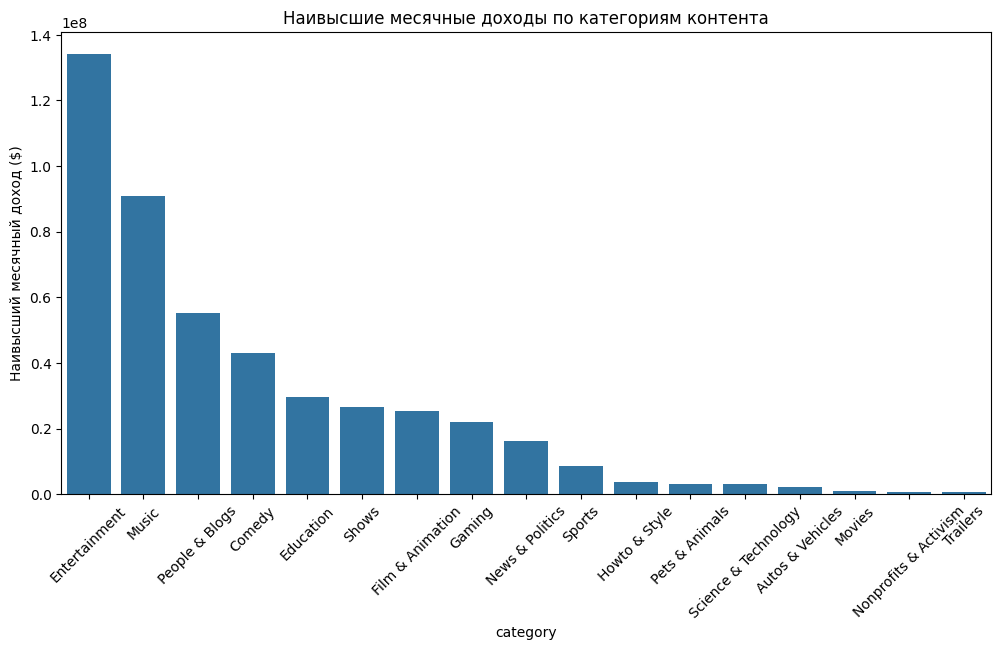

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=category_earnings.index, y=category_earnings.values)
plt.xticks(rotation=45)
plt.title('Наивысшие месячные доходы по категориям контента')
plt.ylabel('Наивысший месячный доход ($)')
plt.show()

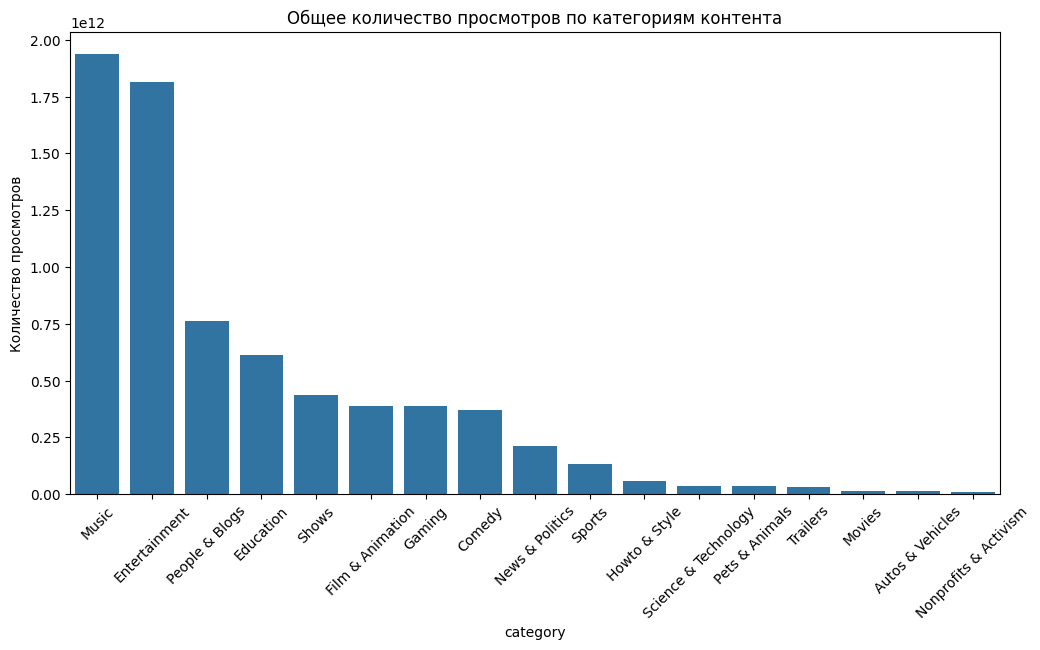

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=category_views.index, y=category_views.values)
plt.xticks(rotation=45)
plt.title('Общее количество просмотров по категориям контента')
plt.ylabel('Количество просмотров')
plt.show()

## 2. Диаграммы, библиотека Seaborn

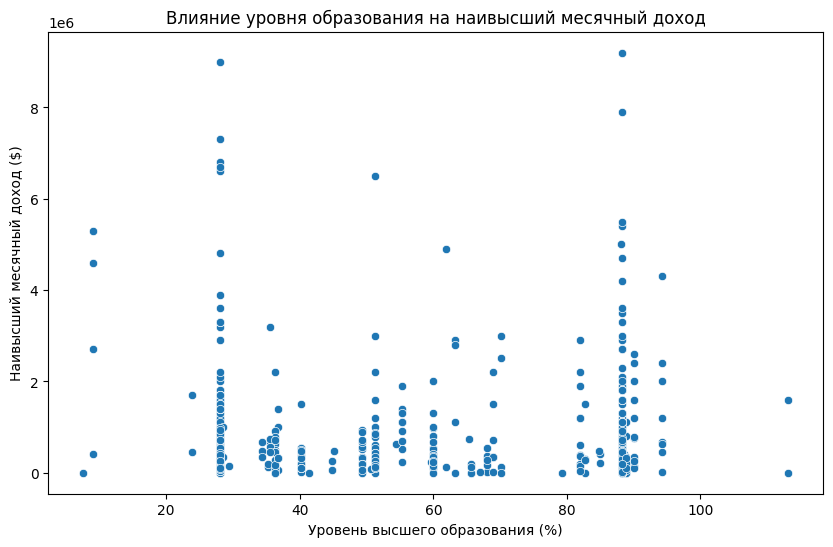

In [ ]:
# Влияние уровня образования и дохода
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'gross_tertiary_education_enrollment', y = 'highest_monthly_earnings', data = df)
plt.title('Влияние уровня образования на наивысший месячный доход')
plt.xlabel('Уровень высшего образования (%)')
plt.ylabel('Наивысший месячный доход ($)')
plt.show()

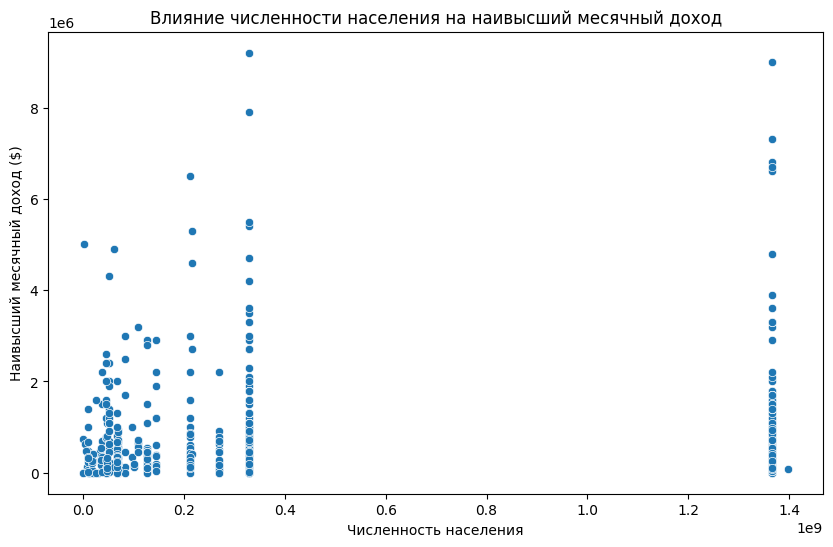

In [ ]:
# Влияние численности населения и дохода
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='highest_monthly_earnings', data=df)
plt.title('Влияние численности населения на наивысший месячный доход')
plt.xlabel('Численность населения')
plt.ylabel('Наивысший месячный доход ($)')
plt.show()


Социально-экономические факторы, такие как уровень образования и численность населения, могут значительно повлиять на успешность YouTube-каналов. Анализ показал, что каналы из стран с высоким уровнем высшего образования и большей численностью населения, как правило, имеют более высокий доход.


## 3. "Портрет" типичного потребителя (вывод к разделу 3)

**Типичный потребитель YouTube** — это мужчина в возрасте от 18 до 35 лет, который активно пользуется интернетом и проводит значительное количество времени на платформе. Он живет в городах с населением более 100 тысяч человек и часто ищет развлекательный контент, обзоры товаров и обучающие видео.

# Общий вывод по проекту

Подводя итог, следует отметить, что, сосредоточив усилия на популярных темах и учитывая интересы высокообразованной аудитории, вы создадите прочную основу для успешного контента. Это укрепит ваши позиции на рынке и повысит ценность ресурса для пользователя. Таким образом, можно ожидать не только привлечение новых пользователей, но и формирование лояльного сообщества вокруг качественного контента.